# Bibliotecas utilizadas


In [31]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler





## Leitura e Preparação dos dados

In [32]:
mhr = pd.read_csv("/content/Maternal Health Risk Data Set.csv")
mhr.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Visualizações

In [33]:
risco=['low risk', "mid risk", 'high risk']
cores = ["green", "yellow","red"]

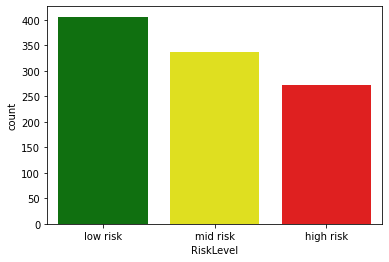

In [34]:
sns.countplot(x='RiskLevel', data=mhr, order=risco, palette =cores)


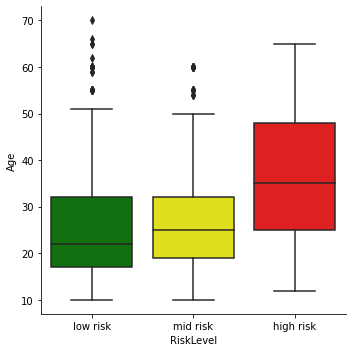

In [35]:
sns.catplot(x='RiskLevel', y = 'Age',kind='box', data = mhr ,order= risco,palette = cores)


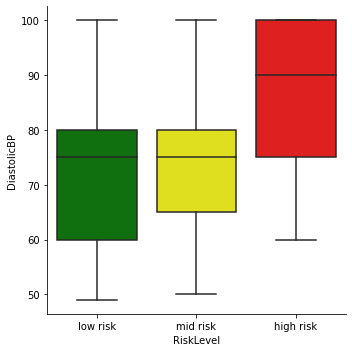

In [36]:
sns.catplot(x='RiskLevel', y = 'DiastolicBP',kind='box', data = mhr ,order= risco,palette = cores)


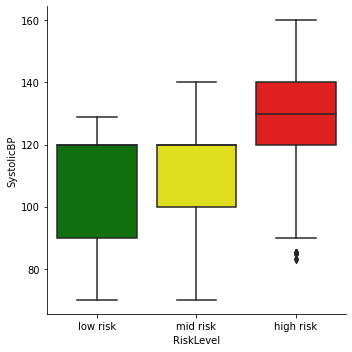

In [37]:
sns.catplot(x='RiskLevel', y = 'SystolicBP',kind='box', data = mhr ,order= risco,palette = cores)
plt.savefig("sistolic.png")

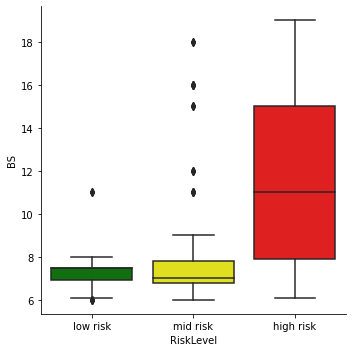

In [30]:
sns.catplot(x='RiskLevel', y = 'BS',kind='box', data = mhr ,order= risco,palette = cores)



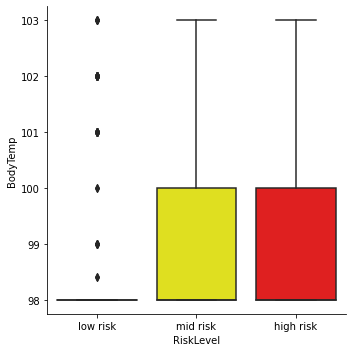

In [38]:
sns.catplot(x='RiskLevel', y = 'BodyTemp',kind='box', data = mhr ,order= risco,palette = cores)


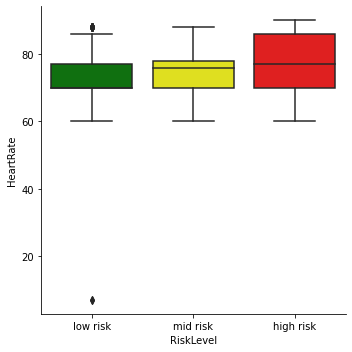

In [39]:
sns.catplot(x='RiskLevel', y = 'HeartRate',kind='box', data = mhr ,order= risco,palette = cores)


## KNN

## Teste com 70% dos dados para treino 

In [40]:
X = mhr.drop(columns = 'RiskLevel')
y = mhr['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state = 21)



0.005011320114135742
segundos
Accuracy: 0.69
              precision    recall  f1-score   support

   high risk       0.80      0.68      0.74        82
    low risk       0.69      0.79      0.74       129
    mid risk       0.59      0.55      0.57        94

    accuracy                           0.69       305
   macro avg       0.69      0.68      0.68       305
weighted avg       0.69      0.69      0.69       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


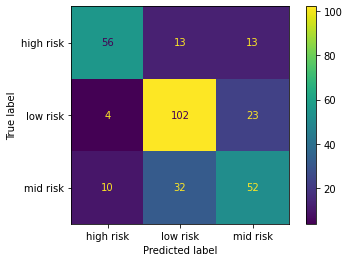

In [41]:
# utilizando os 5 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors = 5,weights='uniform',p=2)

inicio = time.time()
knn.fit(X_train, y_train)
fim = time.time()
resultado_knn = knn.predict(X_test)
print(fim - inicio)
print("segundos")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, resultado_knn)))

print(classification_report(y_test,resultado_knn))
fig = plot_confusion_matrix(knn, X_test, y_test)
plt.savefig('figura7.png')


0.004996061325073242
segundos
Accuracy: 0.69
              precision    recall  f1-score   support

   high risk       0.73      0.70      0.71        82
    low risk       0.70      0.81      0.76       129
    mid risk       0.59      0.49      0.53        94

    accuracy                           0.68       305
   macro avg       0.68      0.67      0.67       305
weighted avg       0.68      0.68      0.68       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


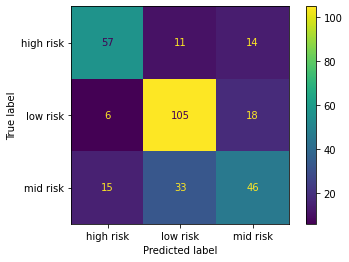

In [42]:
# utilizando os 7 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors = 7,weights='uniform',p=2)
inicio = time.time()
knn.fit(X_train, y_train)
fim = time.time()
print(fim - inicio)
print("segundos")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, resultado_knn)))
resultado_knn = knn.predict(X_test)
print(classification_report(y_test,resultado_knn))
fig = plot_confusion_matrix(knn, X_test, y_test)
plt.savefig('figura8.png')


0.004029035568237305
segundos
Accuracy: 0.68
              precision    recall  f1-score   support

   high risk       0.77      0.66      0.71        82
    low risk       0.68      0.78      0.73       129
    mid risk       0.55      0.51      0.53        94

    accuracy                           0.67       305
   macro avg       0.67      0.65      0.66       305
weighted avg       0.67      0.67      0.66       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


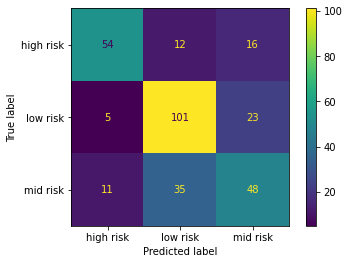

In [43]:
# utilizando os 11 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors = 11,weights='uniform',p=2)

inicio = time.time()
knn.fit(X_train, y_train)
fim = time.time()
print(fim - inicio)
print("segundos")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, resultado_knn)))
resultado_knn = knn.predict(X_test)
print(classification_report(y_test,resultado_knn))
fig = plot_confusion_matrix(knn, X_test, y_test)
plt.savefig('figura9.png')



## SVM

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state = 21)

0.07159018516540527
segundos
Accuracy: 0.55
              precision    recall  f1-score   support

   high risk       0.84      0.50      0.63        82
    low risk       0.50      0.99      0.66       129
    mid risk       0.00      0.00      0.00        94

    accuracy                           0.55       305
   macro avg       0.45      0.50      0.43       305
weighted avg       0.44      0.55      0.45       305



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

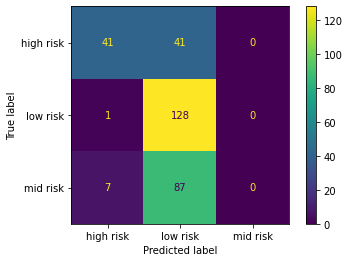

In [45]:
rbf = svm.SVC(kernel='rbf', C=0.1)
ono = OneVsOneClassifier(rbf)
inicio = time.time()
ono.fit(X_train, y_train)
fim = time.time()
print(fim - inicio)
print("segundos")

rbf_pred = ono.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rbf_pred)))
print(classification_report(y_test,rbf_pred))
plot_confusion_matrix(ono, X_test, y_test)
plt.savefig('figura10.png')

0.12381625175476074
segundos
Accuracy: 0.67
              precision    recall  f1-score   support

   high risk       0.80      0.67      0.73        82
    low risk       0.63      0.88      0.74       129
    mid risk       0.62      0.37      0.47        94

    accuracy                           0.67       305
   macro avg       0.69      0.64      0.64       305
weighted avg       0.67      0.67      0.65       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


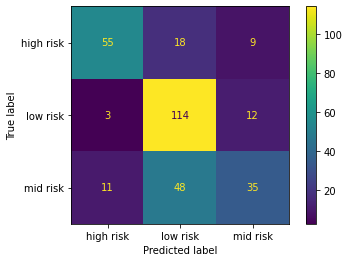

In [55]:
poly = svm.SVC(kernel='poly', C=0.1)
ono = OneVsOneClassifier(poly)
inicio = time.time()
ono.fit(X_train, y_train)
fim = time.time()
print(fim - inicio)
print("segundos")

poly_pred = ono.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, poly_pred)))
print(classification_report(y_test,poly_pred))
plot_confusion_matrix(ono, X_test, y_test)
plt.savefig('figura10e2.png')

0.0876929759979248
segundos
Accuracy: 0.70
              precision    recall  f1-score   support

   high risk       0.79      0.76      0.77        82
    low risk       0.71      0.85      0.77       129
    mid risk       0.57      0.44      0.49        94

    accuracy                           0.70       305
   macro avg       0.69      0.68      0.68       305
weighted avg       0.69      0.70      0.69       305



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


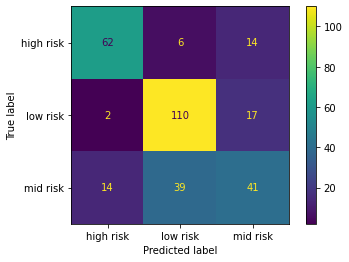

In [47]:
rbf = svm.SVC(kernel='linear', C=0.1)
ono = OneVsOneClassifier(rbf)
inicio = time.time()
ono.fit(X_train, y_train)
fim = time.time()
print(fim - inicio)
print("segundos")

linear_pred = ono.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, linear_pred)))
print(classification_report(y_test,linear_pred))
plot_confusion_matrix(ono, X_test, y_test)
plt.savefig('figura11.png')

# MPL

In [48]:
#separando dados em treio e teste e aplicando escalas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state = 21)

sc=StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



## MLP(150,100,50)

4.676260232925415
segundos
              precision    recall  f1-score   support

   high risk       0.89      0.85      0.87        82
    low risk       0.79      0.88      0.84       129
    mid risk       0.74      0.65      0.69        94

    accuracy                           0.80       305
   macro avg       0.81      0.80      0.80       305
weighted avg       0.80      0.80      0.80       305

Accuracy: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


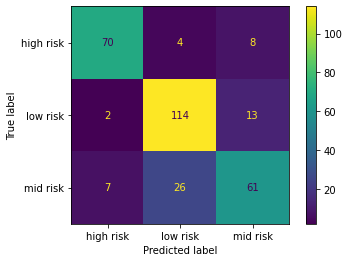

In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 600,activation = 'relu',
                        random_state = 21,
                        solver = 'adam')
inicio = time.time()
mlp.fit(X_train_scaled,y_train) 
fim = time.time()
print(fim - inicio)
print("segundos")

mlp_previsao = mlp.predict(X_test_scaled)
print(classification_report(y_test,mlp_previsao))
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, mlp_previsao)))
plt.savefig('figura12.png')


12.30989933013916
segundos
              precision    recall  f1-score   support

   high risk       0.84      0.91      0.88        82
    low risk       0.93      0.88      0.90       129
    mid risk       0.85      0.84      0.84        94

    accuracy                           0.88       305
   macro avg       0.87      0.88      0.88       305
weighted avg       0.88      0.88      0.88       305

Accuracy: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


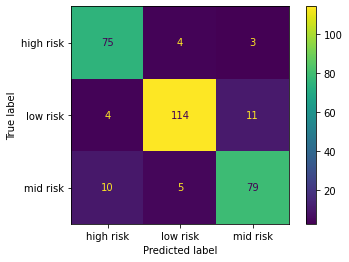

In [50]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 600,activation = 'tanh',
                        random_state = 21,
                        solver = 'adam')

inicio = time.time()
mlp.fit(X_train_scaled,y_train) 
fim = time.time()
print(fim - inicio)
print("segundos")

mlp_previsao = mlp.predict(X_test_scaled)
print(classification_report(y_test,mlp_previsao))
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, mlp_previsao)))
plt.savefig('figura13.png')

## MLP(120,80,30)

3.49450421333313
segundos
              precision    recall  f1-score   support

   high risk       0.88      0.89      0.88        82
    low risk       0.89      0.81      0.85       129
    mid risk       0.73      0.82      0.77        94

    accuracy                           0.83       305
   macro avg       0.83      0.84      0.83       305
weighted avg       0.84      0.83      0.83       305

Accuracy: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


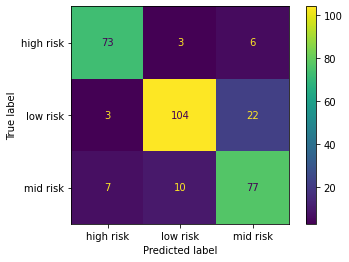

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(120,80,30),
                        max_iter = 600,activation = 'relu',
                        random_state = 21,
                        solver = 'adam')

inicio = time.time()
mlp.fit(X_train_scaled,y_train) 
fim = time.time()
print(fim - inicio)
print("segundos")

mlp_previsao = mlp.predict(X_test_scaled)
print(classification_report(y_test,mlp_previsao))
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, mlp_previsao)))
plt.savefig('figura14.png')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


9.045679807662964
segundos
              precision    recall  f1-score   support

   high risk       0.85      0.89      0.87        82
    low risk       0.92      0.88      0.90       129
    mid risk       0.81      0.83      0.82        94

    accuracy                           0.87       305
   macro avg       0.86      0.87      0.86       305
weighted avg       0.87      0.87      0.87       305

Accuracy: 0.87


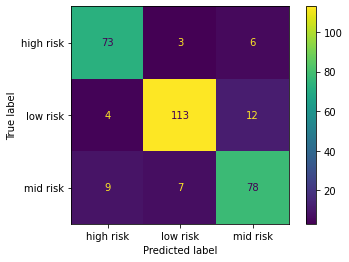

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(120,80,30),
                        max_iter = 600,activation = 'tanh',
                        random_state = 21,
                        solver = 'adam')
inicio = time.time()
mlp.fit(X_train_scaled,y_train) 
fim = time.time()
print(fim - inicio)
print("segundos")

mlp_previsao = mlp.predict(X_test_scaled)
print(classification_report(y_test,mlp_previsao))
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, mlp_previsao)))
plt.savefig('figura15.png')

MLP(100,50,30)

2.9353275299072266
segundos
              precision    recall  f1-score   support

   high risk       0.85      0.89      0.87        82
    low risk       0.80      0.91      0.86       129
    mid risk       0.81      0.62      0.70        94

    accuracy                           0.82       305
   macro avg       0.82      0.81      0.81       305
weighted avg       0.82      0.82      0.81       305

Accuracy: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


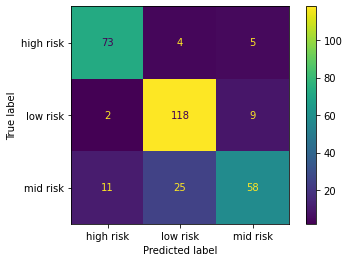

In [53]:

mlp = MLPClassifier(hidden_layer_sizes=(100,50,30),
                        max_iter = 600,activation = 'relu',
                        random_state = 21,
                        solver = 'adam')
inicio = time.time()
mlp.fit(X_train_scaled,y_train) 
fim = time.time()
print(fim - inicio)
print("segundos")
mlp_previsao = mlp.predict(X_test_scaled)
print(classification_report(y_test,mlp_previsao))
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, mlp_previsao)))
plt.savefig('figura16.png')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


12.913803339004517
segundos
              precision    recall  f1-score   support

   high risk       0.88      0.89      0.88        82
    low risk       0.88      0.87      0.88       129
    mid risk       0.79      0.80      0.79        94

    accuracy                           0.85       305
   macro avg       0.85      0.85      0.85       305
weighted avg       0.85      0.85      0.85       305

Accuracy: 0.85


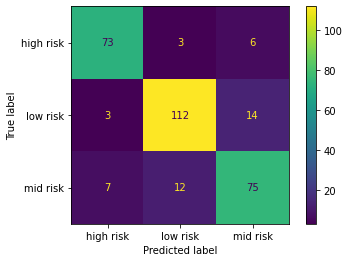

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,30),
                        max_iter = 600,activation = 'tanh',
                        random_state = 21,
                        solver = 'adam')

inicio = time.time()
mlp.fit(X_train_scaled,y_train) 
fim = time.time()
print(fim - inicio)
print("segundos")

mlp_previsao = mlp.predict(X_test_scaled)
print(classification_report(y_test,mlp_previsao))
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, mlp_previsao)))
plt.savefig('figura17.png')

In [28]:
gramlp = [0.8,0.88,0.83,0.87,0.82,0.85]
grasvm = [0.55,0.67,0.7]
graknn = [0.69,0.69,0.68]

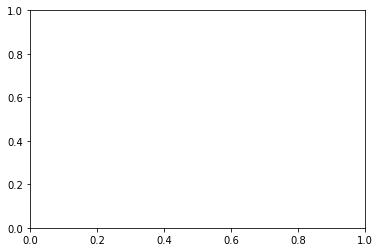

In [29]:
sns.lineplot()